In [1]:
import os
import nltk
nltk.download('brown')
import nltk.corpus

[nltk_data] Downloading package brown to /Users/elahe/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
from nltk.corpus import brown
brown.words()
from nltk.tokenize import word_tokenize



In [3]:
AI= """What is artificial intelligence (AI)?

Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems. 

Specific applications of AI include expert systems, natural language processing, speech recognition and machine vision"""

AI_tokens= word_tokenize (AI)
AI_tokens  

['What',
 'is',
 'artificial',
 'intelligence',
 '(',
 'AI',
 ')',
 '?',
 'Artificial',
 'intelligence',
 'is',
 'the',
 'simulation',
 'of',
 'human',
 'intelligence',
 'processes',
 'by',
 'machines',
 ',',
 'especially',
 'computer',
 'systems',
 '.',
 'Specific',
 'applications',
 'of',
 'AI',
 'include',
 'expert',
 'systems',
 ',',
 'natural',
 'language',
 'processing',
 ',',
 'speech',
 'recognition',
 'and',
 'machine',
 'vision']

In [4]:
from nltk.probability import FreqDist
fdist=FreqDist()


In [5]:
for word in AI_tokens:
    fdist [word.lower()]+=1
fdist

FreqDist({'intelligence': 3, ',': 3, 'is': 2, 'artificial': 2, 'ai': 2, 'of': 2, 'systems': 2, 'what': 1, '(': 1, ')': 1, ...})

In [6]:
fdist_top10 = fdist.most_common (10)
fdist_top10

[('intelligence', 3),
 (',', 3),
 ('is', 2),
 ('artificial', 2),
 ('ai', 2),
 ('of', 2),
 ('systems', 2),
 ('what', 1),
 ('(', 1),
 (')', 1)]

In [7]:
from nltk.stem import PorterStemmer
pst= PorterStemmer() # find the base form or root form of word

In [8]:
pst.stem("having")

'have'

In [9]:
words_to_stem= ['give', 'giving', 'given', 'gave']
for words in words_to_stem:
    print (words + ":" + pst.stem(words))

give:give
giving:give
given:given
gave:gave


In [10]:
# Lemmatization
from nltk.stem import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
word_lem= WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /Users/elahe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/elahe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
word_lem.lemmatize('corpora')

'corpus'

In [12]:
for words in words_to_stem:
    print(words+":"+word_lem.lemmatize(words))

give:give
giving:giving
given:given
gave:gave


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/elahe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
len(stopwords.words('english'))

179

In [16]:
fdist_top10

[('intelligence', 3),
 (',', 3),
 ('is', 2),
 ('artificial', 2),
 ('ai', 2),
 ('of', 2),
 ('systems', 2),
 ('what', 1),
 ('(', 1),
 (')', 1)]

In [17]:
import re
punctuation=re.compile (r'[-.?!,:;()|0-9]')

In [18]:
# removing '[-.?!,:;()|0-9]'
post_punctuation =[]
for words in AI_tokens:
    word= punctuation.sub("",words)
    if len(word)>0:
        post_punctuation.append(word)



In [19]:
post_punctuation

['What',
 'is',
 'artificial',
 'intelligence',
 'AI',
 'Artificial',
 'intelligence',
 'is',
 'the',
 'simulation',
 'of',
 'human',
 'intelligence',
 'processes',
 'by',
 'machines',
 'especially',
 'computer',
 'systems',
 'Specific',
 'applications',
 'of',
 'AI',
 'include',
 'expert',
 'systems',
 'natural',
 'language',
 'processing',
 'speech',
 'recognition',
 'and',
 'machine',
 'vision']

In [20]:
# Part of speech
sent= "Timothy is a natural when it comes to drawing"
sent_tokens= word_tokenize(sent)

In [21]:
nltk.download('averaged_perceptron_tagger')
for token in sent_tokens:
    print (nltk.pos_tag([token]))

[('Timothy', 'NN')]
[('is', 'VBZ')]
[('a', 'DT')]
[('natural', 'JJ')]
[('when', 'WRB')]
[('it', 'PRP')]
[('comes', 'VBZ')]
[('to', 'TO')]
[('drawing', 'VBG')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/elahe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
sent2= "John is eating a delicious cake"
sent2_tokens=word_tokenize(sent2)
for token in sent2_tokens:
    print(nltk.pos_tag([token]))

[('John', 'NNP')]
[('is', 'VBZ')]
[('eating', 'VBG')]
[('a', 'DT')]
[('delicious', 'JJ')]
[('cake', 'NN')]


In [23]:
#Name Entity Recognition --> 
# Geo-Political, Geo-Socio-Political Group
# Facility, Organization, Person, Location

S= "Google's Sunder Pichai introduced the new Pixel at Minnesota Roi Center Event"
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/elahe/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/elahe/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
S_tokens= word_tokenize(S)
S_tags=nltk.pos_tag(S_tokens)

In [25]:
S_NER= ne_chunk(S_tags)
print(S_NER)

(S
  (GPE Google/NNP)
  's/POS
  (ORGANIZATION Sunder/NNP Pichai/NNP)
  introduced/VBD
  the/DT
  new/JJ
  Pixel/NNP
  at/IN
  (ORGANIZATION Minnesota/NNP Roi/NNP Center/NNP)
  Event/NNP)


In [26]:
NE_sent= "The US President stays in WHITE HOUSE"
NE_tokens = word_tokenize(NE_sent)
NE_tags= nltk.pos_tag(NE_tokens)

In [27]:
NE_NER= ne_chunk(NE_tags)
print(NE_NER)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  (FACILITY WHITE/NNP HOUSE/NNP))


In [28]:
# Syntax -> Rules, Principles, Process


In [29]:
# Chunking --> Picking up individual pieces of Information
# and 
#Grouping them into bigger peices 
# we (NP) Caught (VBD) the pink panther (Chunk--> noun phrase)
new = "The big cat ate the little mouse who was after fresh cheese"
new_tokens = nltk.pos_tag(word_tokenize(new))
new_tokens

[('The', 'DT'),
 ('big', 'JJ'),
 ('cat', 'NN'),
 ('ate', 'VBD'),
 ('the', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('after', 'IN'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

In [30]:
pip install svgling # for show the Tree

Note: you may need to restart the kernel to use updated packages.


In [31]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" # NP=> Noun Phrase


In [32]:
chunk_parser= nltk.RegexpParser(grammar_np)

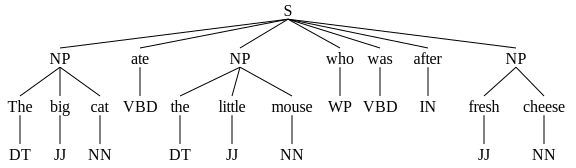

In [33]:
chunk_result = chunk_parser.parse(new_tokens)
chunk_result